In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import metric_learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y = load_wine(return_X_y=True)

In [4]:
n_iter = 20

In [5]:
def plot_tsne(X, y, title, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [6]:
def run_pipeline(X, y, model=None, plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    metric = None
    if model == 'scml':
        scml = metric_learn.SCML_Supervised(n_basis=400,
                                            max_iter=100000, 
                                            output_iter=5000)
        scml.fit(X_train, y_train)
        metric= scml.get_metric()
        X = scml.transform(X)
    
    elif model == 'lmnn':
        lmnn = metric_learn.LMNN(k=5, learn_rate=1e-6)
        lmnn.fit(X_train, y_train)
        metric= lmnn.get_metric()
        X = lmnn.transform(X)
        
    elif model == 'itml':
        itml = metric_learn.ITML_Supervised()
        itml.fit(X_train, y_train)
        metric= itml.get_metric()
        X = itml.transform(X)
        
    knn = KNeighborsClassifier()
    if metric != None:
        knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    
    score = accuracy_score(y_test, y_test_pred)
    
    if plot == True:
        plot_tsne(X, y, model)    
    return score

## Baseline

  0%|          | 0/20 [00:00<?, ?it/s]

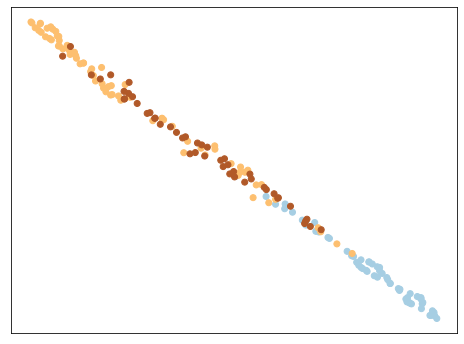

100%|██████████| 20/20 [00:00<00:00, 33.09it/s]


In [7]:
baseline_acc_scores = []
plot = True
for _ in tqdm(range(n_iter)):
    baseline_acc_scores.append(run_pipeline(X, y, model=None, plot = plot))
    plot = False

In [8]:
pd.Series(baseline_acc_scores).describe()

count    20.000000
mean      0.697222
std       0.064926
min       0.555556
25%       0.666667
50%       0.694444
75%       0.729167
max       0.805556
dtype: float64

## SCML

  0%|          | 0/20 [00:00<?, ?it/s]

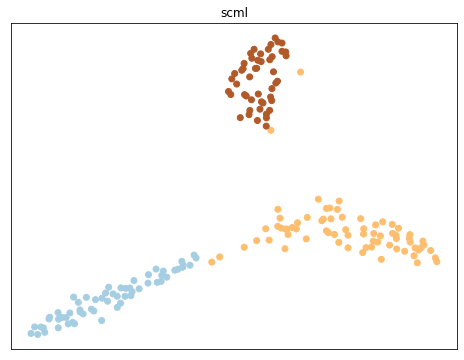

100%|██████████| 20/20 [01:36<00:00,  4.81s/it]


In [9]:
acc_scores = []
plot = True
for _ in tqdm(range(n_iter)):
    acc_scores.append(run_pipeline(X, y, model='scml', plot=plot))
    plot = False

In [10]:
pd.Series(acc_scores).describe()

count    20.000000
mean      0.955556
std       0.032990
min       0.888889
25%       0.937500
50%       0.958333
75%       0.972222
max       1.000000
dtype: float64

## LMNN

  0%|          | 0/20 [00:00<?, ?it/s]

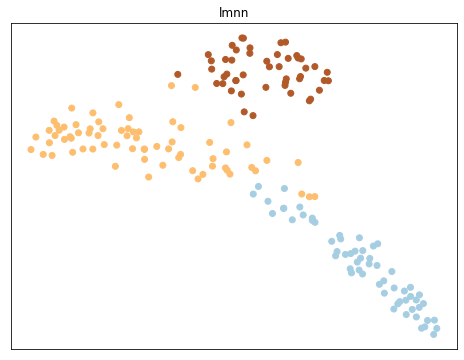

100%|██████████| 20/20 [00:37<00:00,  1.85s/it]


In [11]:
lmnn_scores = []
plot = True
for _ in tqdm(range(n_iter)):
    lmnn_scores.append(run_pipeline(X, y, model='lmnn', plot=plot))
    plot = False

In [12]:
pd.Series(lmnn_scores).describe()

count    20.000000
mean      0.955556
std       0.029064
min       0.888889
25%       0.944444
50%       0.972222
75%       0.972222
max       1.000000
dtype: float64

## ITML

  0%|          | 0/20 [00:00<?, ?it/s]

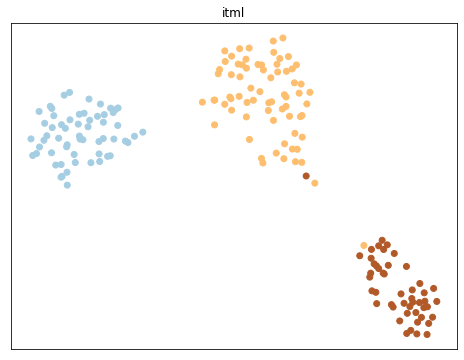

100%|██████████| 20/20 [01:48<00:00,  5.43s/it]


In [13]:
itml_scores = []
plot = True
for _ in tqdm(range(n_iter)):
    itml_scores.append(run_pipeline(X, y, model='itml', plot=plot))
    plot = False

In [14]:
pd.Series(itml_scores).describe()

count    20.000000
mean      0.966667
std       0.035596
min       0.888889
25%       0.944444
50%       0.972222
75%       1.000000
max       1.000000
dtype: float64